<a href="https://colab.research.google.com/github/jgkorman/Python-Projects/blob/main/State_Capture_and_Populism_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [375]:
!pip install linearmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [376]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from linearmodels import PanelOLS
from linearmodels import RandomEffects
import statsmodels.api as sm

In [377]:
fname = "/content/drive/MyDrive/Delaware/Julio Work/Finalized_StateCapture_Dataset.xlsx"
sc = pd.read_excel(fname)

In [378]:
sc

,ID,Country,year,FDI_Inflows,DV_Populism (populist president in power that year or not (0 or 1),Time,TRANS,VDEM.Party.Inst,prtyin,Logprtyin,...,v2mecenefm,v2xnp_pres,v2xnp_client,v2xps_party,v2x_accountability,v2x_accountability transformed,prtyinXaccountability,prtyinXlegconstraints,prtyinXjudicialconstraints,prtyinXpresidentialism
0,1,Argentina,1996,6.948537e+09,NaN,0,0.0,0.688,7.0,0.845098,...,1.725,0.315,0.493,0.688,1.424,2.474,17.318,4.865,4.109,2.205
1,1,Argentina,1997,9.160272e+09,NaN,1,0.0,0.688,8.0,0.903090,...,1.725,0.315,0.491,0.688,1.414,2.464,19.712,5.560,4.696,2.520
2,1,Argentina,1998,7.290657e+09,NaN,2,0.0,0.688,9.0,0.954243,...,1.725,0.311,0.482,0.688,1.423,2.473,22.257,6.255,5.409,2.799
3,1,Argentina,1999,2.398770e+10,NaN,3,0.0,0.688,10.0,1.000000,...,1.725,0.310,0.482,0.688,1.429,2.479,24.790,6.950,6.070,3.100
4,1,Argentina,2000,1.041831e+10,NaN,4,1.0,0.682,1.0,0.000000,...,2.047,0.234,0.409,0.682,1.484,2.534,2.534,0.701,0.717,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,19,Venezuela,2013,2.145000e+09,NaN,17,0.0,0.572,15.0,1.176091,...,-1.155,0.966,0.813,0.572,-0.259,0.791,11.865,0.465,0.345,14.490
414,19,Venezuela,2014,1.135000e+09,NaN,18,0.0,0.570,16.0,1.204120,...,-1.316,0.969,0.809,0.570,-0.295,0.755,12.080,0.496,0.288,15.504
415,19,Venezuela,2015,2.956000e+09,NaN,19,0.0,0.550,17.0,1.230449,...,-1.661,0.961,0.813,0.550,-0.179,0.871,14.807,3.247,0.306,16.337
416,19,Venezuela,2016,1.587000e+09,NaN,20,0.0,0.536,18.0,1.255273,...,-1.661,0.964,0.890,0.536,-0.158,0.892,16.056,6.480,0.270,17.352


In [379]:
fname = "/content/drive/MyDrive/Delaware/Julio Work/Populist presidents.xlsx"
poppres = pd.read_excel(fname)
poppres

,Country,Year,PopDV,YearsPOP
0,Argentina,1996.0,0,0.0
1,Argentina,1997.0,0,0.0
2,Argentina,1998.0,0,0.0
3,Argentina,1999.0,0,0.0
4,Argentina,2000.0,0,0.0
...,...,...,...,...
464,Venezuela,2018.0,1,20.0
465,Venezuela,2019.0,1,21.0
466,Venezuela,2020.0,1,22.0
467,Venezuela,2021.0,1,23.0


In [380]:
print(sc['Country'].unique())
print(len(sc['Country'].unique()))

['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'Costa Rica' 'Cuba'
 'Dom. Rep.' 'Ecuador' 'Guatemala' 'Honduras' 'Mexico' 'Nicaragua'
 'Panama' 'Peru' 'Paraguay' 'El Salvador' 'Uruguay' 'Venezuela']
19


In [381]:
print(poppres['Country'].unique())
print(len(poppres['Country'].unique()))

['Argentina' 'Bolivia' 'Brazil' 'Chile' 'Colombia' 'CostaRica' 'DomRep'
 'Ecuador' 'ElSalvador' 'Guatemala' 'Honduras' 'Mexico' 'Nicaragua'
 'Panama' 'Paraguay' 'Peru' 'Uruguay' 'Venezuela' nan]
19


In [382]:
poppres_country = poppres["Country"].replace({"CostaRica": "Costa Rica", "DomRep": "Dom. Rep.", "ElSalvador": "El Salvador"})


In [383]:
poppres_country.unique()

array(['Argentina', 'Bolivia', 'Brazil', 'Chile', 'Colombia',
       'Costa Rica', 'Dom. Rep.', 'Ecuador', 'El Salvador', 'Guatemala',
       'Honduras', 'Mexico', 'Nicaragua', 'Panama', 'Paraguay', 'Peru',
       'Uruguay', 'Venezuela', nan], dtype=object)

In [384]:
poppres['country_new'] = poppres_country
poppres = poppres.dropna()

In [385]:
poppres = poppres.drop(columns='Country')
poppres['Year'] = poppres['Year'].astype(int)
poppres

,Year,PopDV,YearsPOP,country_new
0,1996,0,0.0,Argentina
1,1997,0,0.0,Argentina
2,1998,0,0.0,Argentina
3,1999,0,0.0,Argentina
4,2000,0,0.0,Argentina
...,...,...,...,...
463,2017,1,19.0,Venezuela
464,2018,1,20.0,Venezuela
465,2019,1,21.0,Venezuela
466,2020,1,22.0,Venezuela


In [386]:
poppres.dtypes

Year             int64
PopDV           object
YearsPOP       float64
country_new     object
dtype: object

In [387]:
sc

,ID,Country,year,FDI_Inflows,DV_Populism (populist president in power that year or not (0 or 1),Time,TRANS,VDEM.Party.Inst,prtyin,Logprtyin,...,v2mecenefm,v2xnp_pres,v2xnp_client,v2xps_party,v2x_accountability,v2x_accountability transformed,prtyinXaccountability,prtyinXlegconstraints,prtyinXjudicialconstraints,prtyinXpresidentialism
0,1,Argentina,1996,6.948537e+09,NaN,0,0.0,0.688,7.0,0.845098,...,1.725,0.315,0.493,0.688,1.424,2.474,17.318,4.865,4.109,2.205
1,1,Argentina,1997,9.160272e+09,NaN,1,0.0,0.688,8.0,0.903090,...,1.725,0.315,0.491,0.688,1.414,2.464,19.712,5.560,4.696,2.520
2,1,Argentina,1998,7.290657e+09,NaN,2,0.0,0.688,9.0,0.954243,...,1.725,0.311,0.482,0.688,1.423,2.473,22.257,6.255,5.409,2.799
3,1,Argentina,1999,2.398770e+10,NaN,3,0.0,0.688,10.0,1.000000,...,1.725,0.310,0.482,0.688,1.429,2.479,24.790,6.950,6.070,3.100
4,1,Argentina,2000,1.041831e+10,NaN,4,1.0,0.682,1.0,0.000000,...,2.047,0.234,0.409,0.682,1.484,2.534,2.534,0.701,0.717,0.234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,19,Venezuela,2013,2.145000e+09,NaN,17,0.0,0.572,15.0,1.176091,...,-1.155,0.966,0.813,0.572,-0.259,0.791,11.865,0.465,0.345,14.490
414,19,Venezuela,2014,1.135000e+09,NaN,18,0.0,0.570,16.0,1.204120,...,-1.316,0.969,0.809,0.570,-0.295,0.755,12.080,0.496,0.288,15.504
415,19,Venezuela,2015,2.956000e+09,NaN,19,0.0,0.550,17.0,1.230449,...,-1.661,0.961,0.813,0.550,-0.179,0.871,14.807,3.247,0.306,16.337
416,19,Venezuela,2016,1.587000e+09,NaN,20,0.0,0.536,18.0,1.255273,...,-1.661,0.964,0.890,0.536,-0.158,0.892,16.056,6.480,0.270,17.352


In [388]:
sc_pop = pd.merge(sc, poppres, left_on=['Country','year'], right_on = ['country_new','Year'])
sc_pop

,ID,Country,year,FDI_Inflows,DV_Populism (populist president in power that year or not (0 or 1),Time,TRANS,VDEM.Party.Inst,prtyin,Logprtyin,...,v2x_accountability,v2x_accountability transformed,prtyinXaccountability,prtyinXlegconstraints,prtyinXjudicialconstraints,prtyinXpresidentialism,Year,PopDV,YearsPOP,country_new
0,1,Argentina,1996,6.948537e+09,NaN,0,0.0,0.688,7.0,0.845098,...,1.424,2.474,17.318,4.865,4.109,2.205,1996,0,0.0,Argentina
1,1,Argentina,1997,9.160272e+09,NaN,1,0.0,0.688,8.0,0.903090,...,1.414,2.464,19.712,5.560,4.696,2.520,1997,0,0.0,Argentina
2,1,Argentina,1998,7.290657e+09,NaN,2,0.0,0.688,9.0,0.954243,...,1.423,2.473,22.257,6.255,5.409,2.799,1998,0,0.0,Argentina
3,1,Argentina,1999,2.398770e+10,NaN,3,0.0,0.688,10.0,1.000000,...,1.429,2.479,24.790,6.950,6.070,3.100,1999,0,0.0,Argentina
4,1,Argentina,2000,1.041831e+10,NaN,4,1.0,0.682,1.0,0.000000,...,1.484,2.534,2.534,0.701,0.717,0.234,2000,0,0.0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,19,Venezuela,2012,4.986000e+09,NaN,16,0.0,0.544,14.0,1.146128,...,-0.070,0.980,13.720,0.434,0.504,13.258,2012,1,14.0,Venezuela
391,19,Venezuela,2013,2.145000e+09,NaN,17,0.0,0.572,15.0,1.176091,...,-0.259,0.791,11.865,0.465,0.345,14.490,2013,1,15.0,Venezuela
392,19,Venezuela,2014,1.135000e+09,NaN,18,0.0,0.570,16.0,1.204120,...,-0.295,0.755,12.080,0.496,0.288,15.504,2014,1,16.0,Venezuela
393,19,Venezuela,2015,2.956000e+09,NaN,19,0.0,0.550,17.0,1.230449,...,-0.179,0.871,14.807,3.247,0.306,16.337,2015,1,17.0,Venezuela


In [389]:
sc_pop['year'].value_counts()

1996    18
1997    18
2016    18
2015    18
2014    18
2013    18
2012    18
2011    18
2010    18
2009    18
2008    18
2007    18
2006    18
2005    18
2004    18
2003    18
2002    18
2001    18
2000    18
1999    18
1998    18
2017    17
Name: year, dtype: int64

In [390]:
sc_pop

,ID,Country,year,FDI_Inflows,DV_Populism (populist president in power that year or not (0 or 1),Time,TRANS,VDEM.Party.Inst,prtyin,Logprtyin,...,v2x_accountability,v2x_accountability transformed,prtyinXaccountability,prtyinXlegconstraints,prtyinXjudicialconstraints,prtyinXpresidentialism,Year,PopDV,YearsPOP,country_new
0,1,Argentina,1996,6.948537e+09,NaN,0,0.0,0.688,7.0,0.845098,...,1.424,2.474,17.318,4.865,4.109,2.205,1996,0,0.0,Argentina
1,1,Argentina,1997,9.160272e+09,NaN,1,0.0,0.688,8.0,0.903090,...,1.414,2.464,19.712,5.560,4.696,2.520,1997,0,0.0,Argentina
2,1,Argentina,1998,7.290657e+09,NaN,2,0.0,0.688,9.0,0.954243,...,1.423,2.473,22.257,6.255,5.409,2.799,1998,0,0.0,Argentina
3,1,Argentina,1999,2.398770e+10,NaN,3,0.0,0.688,10.0,1.000000,...,1.429,2.479,24.790,6.950,6.070,3.100,1999,0,0.0,Argentina
4,1,Argentina,2000,1.041831e+10,NaN,4,1.0,0.682,1.0,0.000000,...,1.484,2.534,2.534,0.701,0.717,0.234,2000,0,0.0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,19,Venezuela,2012,4.986000e+09,NaN,16,0.0,0.544,14.0,1.146128,...,-0.070,0.980,13.720,0.434,0.504,13.258,2012,1,14.0,Venezuela
391,19,Venezuela,2013,2.145000e+09,NaN,17,0.0,0.572,15.0,1.176091,...,-0.259,0.791,11.865,0.465,0.345,14.490,2013,1,15.0,Venezuela
392,19,Venezuela,2014,1.135000e+09,NaN,18,0.0,0.570,16.0,1.204120,...,-0.295,0.755,12.080,0.496,0.288,15.504,2014,1,16.0,Venezuela
393,19,Venezuela,2015,2.956000e+09,NaN,19,0.0,0.550,17.0,1.230449,...,-0.179,0.871,14.807,3.247,0.306,16.337,2015,1,17.0,Venezuela


In [391]:
sc_pop['Resource_Extraction']

0      0
1      0
2      0
3      0
4      0
      ..
390    1
391    1
392    1
393    1
394    1
Name: Resource_Extraction, Length: 395, dtype: int64

In [392]:
sc_pop.columns

Index(['ID', 'Country', 'year', 'FDI_Inflows',
       'DV_Populism (populist president in power that year or not (0 or 1) ',
       'Time', 'TRANS', 'VDEM.Party.Inst', 'prtyin', 'Logprtyin',
       'SQPrtyinPower', 'CubedPrtyinPower',
       'State.Capture.Inverted.Transformed', 'State.Capture.Inverted',
       'State_Capture (WB)', 'State_Capture.WB.Transformed', 'GDPPC.WB',
       'LogGDPPC', 'VDEM.Lib.DEM', 'POLITY', 'POLITY10', 'POLITYDV',
       'Civ_Lib_FH_1to7_7worst', 'Drug_Trafficking', 'Resource_Extraction',
       'PrtyinPowerXLogGDPPC', 'PercentPOP.Urban.WB', 'POP.WB', 'LogPOP.WB',
       'TOTPercentNatResRentsGDP.WB', 'Econ.Freedom.Heritage',
       'Log.Econ.Freedom.Heritage', 'GDP', 'LogGDP', 'country_text_id',
       'v2x_jucon', 'v2xlg_legcon', 'v2pscohesv', 'v2x_rule', 'v2xcl_prpty',
       'v2xcl_acjst', 'v2x_cspart', 'v2psprlnks', 'v2lgcrrpt', 'v2exbribe',
       'v2mecenefm', 'v2xnp_pres', 'v2xnp_client', 'v2xps_party',
       'v2x_accountability', 'v2x_accountabil

In [393]:
sc_pop.columns

Index(['ID', 'Country', 'year', 'FDI_Inflows',
       'DV_Populism (populist president in power that year or not (0 or 1) ',
       'Time', 'TRANS', 'VDEM.Party.Inst', 'prtyin', 'Logprtyin',
       'SQPrtyinPower', 'CubedPrtyinPower',
       'State.Capture.Inverted.Transformed', 'State.Capture.Inverted',
       'State_Capture (WB)', 'State_Capture.WB.Transformed', 'GDPPC.WB',
       'LogGDPPC', 'VDEM.Lib.DEM', 'POLITY', 'POLITY10', 'POLITYDV',
       'Civ_Lib_FH_1to7_7worst', 'Drug_Trafficking', 'Resource_Extraction',
       'PrtyinPowerXLogGDPPC', 'PercentPOP.Urban.WB', 'POP.WB', 'LogPOP.WB',
       'TOTPercentNatResRentsGDP.WB', 'Econ.Freedom.Heritage',
       'Log.Econ.Freedom.Heritage', 'GDP', 'LogGDP', 'country_text_id',
       'v2x_jucon', 'v2xlg_legcon', 'v2pscohesv', 'v2x_rule', 'v2xcl_prpty',
       'v2xcl_acjst', 'v2x_cspart', 'v2psprlnks', 'v2lgcrrpt', 'v2exbribe',
       'v2mecenefm', 'v2xnp_pres', 'v2xnp_client', 'v2xps_party',
       'v2x_accountability', 'v2x_accountabil

**Setting up the fixed and random effects models**

In [394]:
year = pd.Categorical(sc_pop['year'])

In [395]:
model = sc_pop.set_index(['ID', 'year']).copy()
model['year'] = year

In [396]:
model.columns

Index(['Country', 'FDI_Inflows',
       'DV_Populism (populist president in power that year or not (0 or 1) ',
       'Time', 'TRANS', 'VDEM.Party.Inst', 'prtyin', 'Logprtyin',
       'SQPrtyinPower', 'CubedPrtyinPower',
       'State.Capture.Inverted.Transformed', 'State.Capture.Inverted',
       'State_Capture (WB)', 'State_Capture.WB.Transformed', 'GDPPC.WB',
       'LogGDPPC', 'VDEM.Lib.DEM', 'POLITY', 'POLITY10', 'POLITYDV',
       'Civ_Lib_FH_1to7_7worst', 'Drug_Trafficking', 'Resource_Extraction',
       'PrtyinPowerXLogGDPPC', 'PercentPOP.Urban.WB', 'POP.WB', 'LogPOP.WB',
       'TOTPercentNatResRentsGDP.WB', 'Econ.Freedom.Heritage',
       'Log.Econ.Freedom.Heritage', 'GDP', 'LogGDP', 'country_text_id',
       'v2x_jucon', 'v2xlg_legcon', 'v2pscohesv', 'v2x_rule', 'v2xcl_prpty',
       'v2xcl_acjst', 'v2x_cspart', 'v2psprlnks', 'v2lgcrrpt', 'v2exbribe',
       'v2mecenefm', 'v2xnp_pres', 'v2xnp_client', 'v2xps_party',
       'v2x_accountability', 'v2x_accountability transforme

In [397]:
model[['State.Capture.Inverted.Transformed', 'Country', 'v2xnp_pres', 'v2x_accountability transformed']]

State.Capture.Inverted.Transformed    Country  v2xnp_pres  \
ID year                                                              
1  1996                            2.601000  Argentina       0.315   
   1997                                 NaN  Argentina       0.315   
   1998                            2.613000  Argentina       0.311   
   1999                                 NaN  Argentina       0.310   
   2000                            2.692000  Argentina       0.234   
...                                     ...        ...         ...   
19 2012                            3.768169  Venezuela       0.947   
   2013                            3.814032  Venezuela       0.966   
   2014                            3.899562  Venezuela       0.969   
   2015                            3.891322  Venezuela       0.961   
   2016                            3.853828  Venezuela       0.964   

         v2x_accountability transformed  
ID year                                  
1  1996                           2.474  
   1997                           2.464  
   1998                           2.473  
   1999                           2.479  
   2000                           2.534  
...                                 ...  
19 2012                           0.980  
   2013                           0.791  
   2014                           0.755  
   2015                           0.871  
   2016                           0.892  

[395 rows x 4 columns]

In [398]:
model.columns

Index(['Country', 'FDI_Inflows',
       'DV_Populism (populist president in power that year or not (0 or 1) ',
       'Time', 'TRANS', 'VDEM.Party.Inst', 'prtyin', 'Logprtyin',
       'SQPrtyinPower', 'CubedPrtyinPower',
       'State.Capture.Inverted.Transformed', 'State.Capture.Inverted',
       'State_Capture (WB)', 'State_Capture.WB.Transformed', 'GDPPC.WB',
       'LogGDPPC', 'VDEM.Lib.DEM', 'POLITY', 'POLITY10', 'POLITYDV',
       'Civ_Lib_FH_1to7_7worst', 'Drug_Trafficking', 'Resource_Extraction',
       'PrtyinPowerXLogGDPPC', 'PercentPOP.Urban.WB', 'POP.WB', 'LogPOP.WB',
       'TOTPercentNatResRentsGDP.WB', 'Econ.Freedom.Heritage',
       'Log.Econ.Freedom.Heritage', 'GDP', 'LogGDP', 'country_text_id',
       'v2x_jucon', 'v2xlg_legcon', 'v2pscohesv', 'v2x_rule', 'v2xcl_prpty',
       'v2xcl_acjst', 'v2x_cspart', 'v2psprlnks', 'v2lgcrrpt', 'v2exbribe',
       'v2mecenefm', 'v2xnp_pres', 'v2xnp_client', 'v2xps_party',
       'v2x_accountability', 'v2x_accountability transforme

In [399]:
model['PopDV'] = model['PopDV'].astype(int)


In [400]:
model['interaction'] = model['PopDV'] * model['v2x_rule']

In [401]:
model['PopDV'].value_counts()

0    286
1    109
Name: PopDV, dtype: int64

In [402]:
model

Country   FDI_Inflows  \
ID year                            
1  1996  Argentina  6.948537e+09   
   1997  Argentina  9.160272e+09   
   1998  Argentina  7.290657e+09   
   1999  Argentina  2.398770e+10   
   2000  Argentina  1.041831e+10   
...            ...           ...   
19 2012  Venezuela  4.986000e+09   
   2013  Venezuela  2.145000e+09   
   2014  Venezuela  1.135000e+09   
   2015  Venezuela  2.956000e+09   
   2016  Venezuela  1.587000e+09   

         DV_Populism (populist president in power that year or not (0 or 1)   \
ID year                                                                        
1  1996                                                NaN                     
   1997                                                NaN                     
   1998                                                NaN                     
   1999                                                NaN                     
   2000                                                NaN                     
...                                                    ...                     
19 2012                                                NaN                     
   2013                                                NaN                     
   2014                                                NaN                     
   2015                                                NaN                     
   2016                                                NaN                     

         Time  TRANS  VDEM.Party.Inst  prtyin  Logprtyin  SQPrtyinPower  \
ID year                                                                   
1  1996     0    0.0            0.688     7.0   0.845098           49.0   
   1997     1    0.0            0.688     8.0   0.903090           64.0   
   1998     2    0.0            0.688     9.0   0.954243           81.0   
   1999     3    0.0            0.688    10.0   1.000000          100.0   
   2000     4    1.0            0.682     1.0   0.000000            1.0   
...       ...    ...              ...     ...        ...            ...   
19 2012    16    0.0            0.544    14.0   1.146128          196.0   
   2013    17    0.0            0.572    15.0   1.176091          225.0   
   2014    18    0.0            0.570    16.0   1.204120          256.0   
   2015    19    0.0            0.550    17.0   1.230449          289.0   
   2016    20    0.0            0.536    18.0   1.255273          324.0   

         CubedPrtyinPower  ...  prtyinXaccountability  prtyinXlegconstraints  \
ID year                    ...                                                 
1  1996             343.0  ...                 17.318                  4.865   
   1997             512.0  ...                 19.712                  5.560   
   1998             729.0  ...                 22.257                  6.255   
   1999            1000.0  ...                 24.790                  6.950   
   2000               1.0  ...                  2.534                  0.701   
...                   ...  ...                    ...                    ...   
19 2012            2744.0  ...                 13.720                  0.434   
   2013            3375.0  ...                 11.865                  0.465   
   2014            4096.0  ...                 12.080                  0.496   
   2015            4913.0  ...                 14.807                  3.247   
   2016            5832.0  ...                 16.056                  6.480   

         prtyinXjudicialconstraints  prtyinXpresidentialism  Year  PopDV  \
ID year                                                                    
1  1996                       4.109                   2.205  1996      0   
   1997                       4.696                   2.520  1997      0   
   1998                       5.409                   2.799  1998      0   
   1999                       6.070                   3.100  1999      0   
   2000                     

# **Populism in the context of weak rule of law increases State Capture**
# GRab the EDI index from Varieties of Demcoracy Dataset 

In [403]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


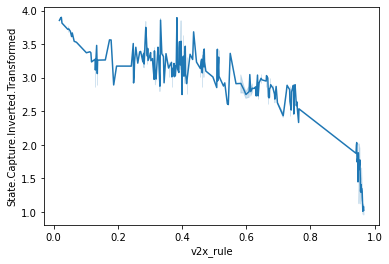

In [404]:
sns.lineplot('v2x_rule', 'State.Capture.Inverted.Transformed', data=model)

# **Creating Marginal Effects**

In [405]:
# random effects 

# added variables 
extras = ['v2xlg_legcon', 'v2x_jucon', 'v2x_rule', 'v2x_cspart', 'v2x_accountability transformed', 'v2xnp_pres', 'v2xcl_prpty']
exog_vars = ['PopDV', 'v2x_rule', 'interaction', 'POLITY10'] # use VDM EDI this will be initial model
# We build on top of this model and add variables stepwise to see if we continue to have the positive statistically significant effect of the interaction term of populism and rule of law
# we try to find a model where it is not statistically significant include  populismDV RULE OF LAW AND INTERACTION IN EVERY MODEL 

#  'prtyin', 'LogGDPPC', 'PercentPOP.Urban.WB', 'Econ.Freedom.Heritage', 'v2x_rule', 'v2x_accountability transformed', 'v2xcl_prpty', 'interaction', 'POLITY10']
exog = sm.add_constant(model[exog_vars])
mod = RandomEffects(model['State.Capture.Inverted.Transformed'], exog)
re_res = mod.fit()
print(re_res)

                                RandomEffects Estimation Summary                                
Dep. Variable:     State.Capture.Inverted.Transformed   R-squared:                        0.2409
Estimator:                              RandomEffects   R-squared (Between):              0.6122
No. Observations:                                 341   R-squared (Within):               0.0942
Date:                                Wed, Jul 06 2022   R-squared (Overall):              0.5877
Time:                                        05:04:11   Log-likelihood                    150.09
Cov. Estimator:                            Unadjusted                                           
                                                        F-statistic:                      26.656
Entities:                                          18   P-value                           0.0000
Avg Obs:                                       18.944   Distribution:                   F(4,336)
Min Obs:                      

/usr/local/lib/python3.7/dist-packages/linearmodels/shared/exceptions.py:37: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Is there a difference between the .cov attribute from the re_res random efects model and the pandas.cov() function for calculating covariance matrix? ____ There IS!!!! You must use the regression variance covariance matrix 

## **1. Create variance covaraince matrix get a dataframe with only variables used in the model** 

In [406]:
model_plot = model[['State.Capture.Inverted.Transformed', 'PopDV', 'v2x_rule', 'interaction', 'POLITY10']].copy()

In [407]:
model_plot

State.Capture.Inverted.Transformed  PopDV  v2x_rule  interaction  \
ID year                                                                     
1  1996                            2.601000      0     0.544        0.000   
   1997                                 NaN      0     0.544        0.000   
   1998                            2.613000      0     0.541        0.000   
   1999                                 NaN      0     0.547        0.000   
   2000                            2.692000      0     0.669        0.000   
...                                     ...    ...       ...          ...   
19 2012                            3.768169      1     0.044        0.044   
   2013                            3.814032      1     0.026        0.026   
   2014                            3.899562      1     0.024        0.024   
   2015                            3.891322      1     0.022        0.022   
   2016                            3.853828      1     0.018        0.018   

         POLITY10  
ID year            
1  1996        17  
   1997        17  
   1998        17  
   1999        18  
   2000        18  
...           ...  
19 2012         7  
   2013        14  
   2014        14  
   2015        14  
   2016        14  

[395 rows x 5 columns]

In [408]:
# creating the covariancem matrix from the cov attribute from the regression output 
cov_matrix = re_res.cov
cov_matrix

,const,PopDV,v2x_rule,interaction,POLITY10
const,0.021474,-0.004069,-0.003130,0.007136,-0.000870
PopDV,-0.004069,0.004796,0.005592,-0.009353,0.000038
v2x_rule,-0.003130,0.005592,0.024725,-0.010755,-0.000592
interaction,0.007136,-0.009353,-0.010755,0.021019,-0.000052
POLITY10,-0.000870,0.000038,-0.000592,-0.000052,0.000066


## **2. Store slope and intercept values its two constitutive terms as objects. So, referencing our R code for the Mexico project, if you're model includes the two constitutive terms and interactions first, as in

response_inexistencia ~ mil_topic+loghomicidecwide+miltopicXloghomicide+...

...you would want to store their relevant coefficients as b1, b2, b3 (taking care to assign b1 as the variable you want to evaluate a 'change' for, and the b2 as the variable you want to evaluate that b1 change across (i.e., across the full range of), and b3 as the interaction

b1<-model_b$beta[1] #mil_topic
b2<-model_b$beta[2] #loghomicide
b3<-model_b$beta[3] #miltopic*loghomicide**

In [409]:
re_res.params

const          3.409709
PopDV         -0.236167
v2x_rule      -1.406157
interaction    0.304133
POLITY10       0.010495
Name: parameter, dtype: float64

Store the individual coefficient estimates for your interaction term and for 

In [410]:
re_res.params[0]

3.4097094409508526

In [411]:
b1 = re_res.params[1]
b2 = re_res.params[2]
b3 = re_res.params[3]
b3

0.3041325526473263

## **3) Next, you want to similarly store some of the variances for all three variables, referencing your covariance matrix, you should be able to pull these out based upon their always being on the diagonal to that matrix, so that whichever row # that variable is listed for in the covariance matrix, you'd recover its variance by referencing covariance[#,#]. Here they are for our R code (make sure that varb1 is for the same variable as b1, etc):

varb1<-model_b$inv[1,1] #mil_topic
varb2<-model_b$inv[2,2] #loghomicide
varb3<-model_b$inv[3,3] #miltopic*loghomicide**

In [412]:
cov_matrix['PopDV'].iloc[1]

0.00479608677794103

In [413]:
np.sqrt(cov_matrix['interaction'].iloc[3])

0.1449775846207093

In [414]:
# getting the variances of our variables 
var1 = cov_matrix['PopDV'].iloc[1]
var2 = cov_matrix['v2x_rule'].iloc[2]
var3 = cov_matrix['interaction'].iloc[3]
var3

0.02101850004245493

In [415]:
cov_matrix

,const,PopDV,v2x_rule,interaction,POLITY10
const,0.021474,-0.004069,-0.003130,0.007136,-0.000870
PopDV,-0.004069,0.004796,0.005592,-0.009353,0.000038
v2x_rule,-0.003130,0.005592,0.024725,-0.010755,-0.000592
interaction,0.007136,-0.009353,-0.010755,0.021019,-0.000052
POLITY10,-0.000870,0.000038,-0.000592,-0.000052,0.000066


## **4. 4) Next you want to store the covariances between each constitutive term coefficient estimate and the interaction term coefficient estimate. This is also obtained from the covariance matrix, but is the row-column intersection between whichever row your interaction term is in and whichever column a particular constitutive term is listed in. So these will always be 'off diagonal', making sure that b1b3 matches the same variable as in b1 above, etc. Here it is for our R example:**

covb1b3<-model_b$inv[3,1] #COV mil_topic and #miltopic*loghomicide
covb2b3<-model_b$inv[3,2] #COV loghomicide and #miltopic*loghomicide

In [416]:
covb1b3 = cov_matrix['interaction'].iloc[1]
covb2b3 = cov_matrix['interaction'].iloc[2]
covb2b3

-0.010755343878258461

In [417]:
cov_matrix

,const,PopDV,v2x_rule,interaction,POLITY10
const,0.021474,-0.004069,-0.003130,0.007136,-0.000870
PopDV,-0.004069,0.004796,0.005592,-0.009353,0.000038
v2x_rule,-0.003130,0.005592,0.024725,-0.010755,-0.000592
interaction,0.007136,-0.009353,-0.010755,0.021019,-0.000052
POLITY10,-0.000870,0.000038,-0.000592,-0.000052,0.000066


In [418]:
# covariance matrix from the model 
re_res.cov

,const,PopDV,v2x_rule,interaction,POLITY10
const,0.021474,-0.004069,-0.003130,0.007136,-0.000870
PopDV,-0.004069,0.004796,0.005592,-0.009353,0.000038
v2x_rule,-0.003130,0.005592,0.024725,-0.010755,-0.000592
interaction,0.007136,-0.009353,-0.010755,0.021019,-0.000052
POLITY10,-0.000870,0.000038,-0.000592,-0.000052,0.000066


## 5) Once you have these pieces stored, follow up to confirm and let me know the following:

i) For the variable you want to evaluate a change for (b1 above), what is its scale (i.e., is it binary or continuous). If it's continuous, what is its mean and SD?

ii) For the variable you want to evaluate the change in b1 across (i.e., b2 above), what is its range?

...Note that in this context, the b1 variable is usually the variable whose direct effect you care about most theoretically, and the b2 is usually what you feel is more so the variable that moderates (lessons/intensifies) that main effect of interest.

In [419]:
model_plot['interaction'].min(), model_plot['interaction'].max()

(0.0, 0.697)

i) its scale is binary in this case (Populism DV representing 1 if populist rule and 0 otherwise)

ii) for the variable evaluating the change in b1 across its range is 0.0 to 0.697

# **Creating a forest plot**

In [420]:
pvalues = re_res.pvalues

In [421]:
forest

,lower,upper,pvalues,coefficientestimates,significance
Constant,3.033861,3.545392,0.000000,3.409709,significant
Populism,-0.279986,-0.005185,0.000728,-0.236167,significant
Rule of Law,-1.201001,-0.517536,0.000000,-1.406157,significant
Interaction,-0.144945,0.419998,0.036670,0.304133,significant
POLITY10,-0.015438,0.015909,0.198069,0.010495,not significant


In [422]:
import numpy as np
coefficientestimates = re_res.params
conf = re_res.conf_int()

# convert log odds to ORs
forest = pd.DataFrame(conf)
forest['pvalues'] = pvalues
forest['coefficientestimates'] = params

# change index labels 
index = ['Constant', 'Populism', 'Rule of Law', 'Interaction', 'POLITY10']
forest.rename(index={'const': 'Constant', 'PopDV': 'Populism', 'v2x_rule':'Rule of Law', 'interaction': 'Interaction'}, inplace=True)
significance = ['significant', 'significant', 'significant', 'significant', 'not significant']

forest['significance'] = significance
forest


,lower,upper,pvalues,coefficientestimates,significance
Constant,3.121455,3.697963,0.000000,3.409709,significant
Populism,-0.372393,-0.099942,0.000728,-0.236167,significant
Rule of Law,-1.715460,-1.096854,0.000000,-1.406157,significant
Interaction,0.018954,0.589311,0.036670,0.304133,significant
POLITY10,-0.005513,0.026503,0.198069,0.010495,not significant


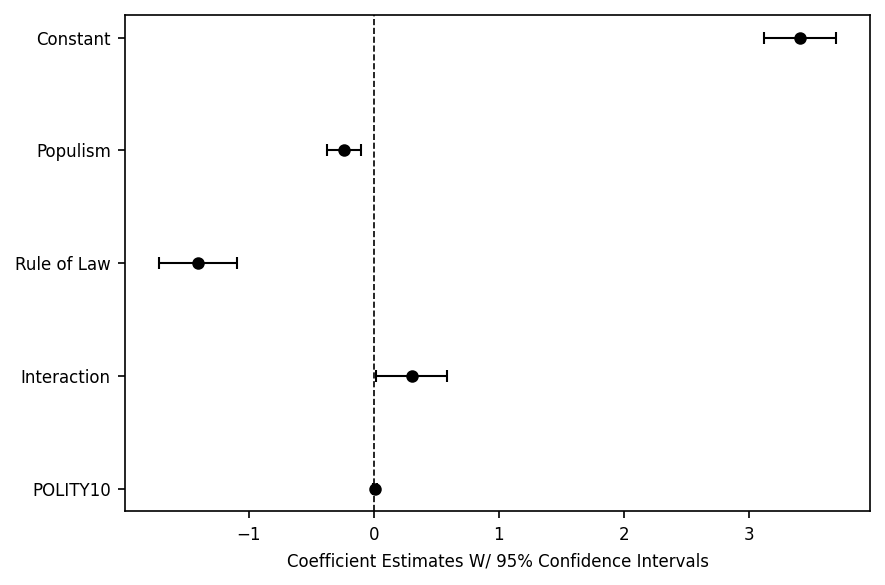

In [423]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4), dpi=150)

ci = [forest.iloc[::-1]['coefficientestimates'] - forest.iloc[::-1]['lower'].values, forest.iloc[::-1]['upper'].values - forest.iloc[::-1]['coefficientestimates']]
plt.errorbar(x=forest.iloc[::-1]['coefficientestimates'], y=forest.iloc[::-1].index.values, xerr=ci,
            color='black',  capsize=3, linestyle='None', linewidth=1,
            marker="o", markersize=5, mfc="black", mec="black")
plt.axvline(x=0, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Coefficient Estimates W/ 95% Confidence Intervals', fontsize=8)
plt.tight_layout()
# plt.savefig('raw_forest_plot.png')
plt.show()


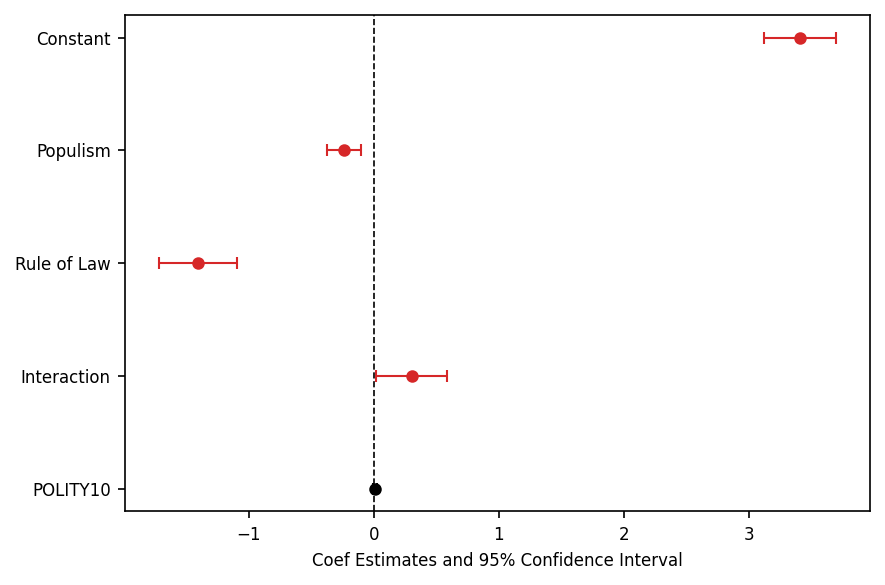

In [424]:
fig, ax = plt.subplots(nrows=1, sharex=True, sharey=True, figsize=(6, 4), dpi=150)
for idx, row in forest.iloc[::-1].iterrows():
    ci = [[row['coefficientestimates'] - row[::-1]['lower']], [row['upper'] - row['coefficientestimates']]]
    if row['significance'] == 'significant':
        plt.errorbar(x=[row['coefficientestimates']], y=[row.name], xerr=ci,
            ecolor='tab:red', capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc="tab:red", mec="tab:red")
    else:
        plt.errorbar(x=[row['coefficientestimates']], y=[row.name], xerr=ci,
            ecolor='black', capsize=3, linestyle='None', linewidth=1, marker="o", 
                     markersize=5, mfc="black", mec="black")
plt.axvline(x=0, linewidth=0.8, linestyle='--', color='black')
plt.tick_params(axis='both', which='major', labelsize=8)
plt.xlabel('Coef Estimates and 95% Confidence Interval', fontsize=8)
plt.tight_layout()

plt.show()

In [425]:
forest[:]

,lower,upper,pvalues,coefficientestimates,significance
Constant,3.121455,3.697963,0.000000,3.409709,significant
Populism,-0.372393,-0.099942,0.000728,-0.236167,significant
Rule of Law,-1.715460,-1.096854,0.000000,-1.406157,significant
Interaction,0.018954,0.589311,0.036670,0.304133,significant
POLITY10,-0.005513,0.026503,0.198069,0.010495,not significant


In [426]:
forest.iloc[:, 3:5]

,coefficientestimates,significance
Constant,3.409709,significant
Populism,-0.236167,significant
Rule of Law,-1.406157,significant
Interaction,0.304133,significant
POLITY10,0.010495,not significant


In [427]:
re_res


Dep. Variable:,State.Capture.Inverted.Transformed,R-squared:,0.2409
Estimator:,RandomEffects,R-squared (Between):,0.6122
No. Observations:,341,R-squared (Within):,0.0942
Date:,"Wed, Jul 06 2022",R-squared (Overall):,0.5877
Time:,05:04:11,Log-likelihood,150.09
Cov. Estimator:,Unadjusted,,
,,F-statistic:,26.656
Entities:,18,P-value,0.0000
Avg Obs:,18.944,Distribution:,"F(4,336)"
Min Obs:,18.000,,
Max Obs:,19.000,F-statistic (robust):,26.208


In [428]:
# fixed effects 
mod = PanelOLS(model['State.Capture.Inverted.Transformed'], exog, entity_effects=True, time_effects=True)

re_res = mod.fit()

print(re_res)

                                  PanelOLS Estimation Summary                                   
Dep. Variable:     State.Capture.Inverted.Transformed   R-squared:                        0.1195
Estimator:                                   PanelOLS   R-squared (Between):              0.4305
No. Observations:                                 341   R-squared (Within):               0.1237
Date:                                Wed, Jul 06 2022   R-squared (Overall):              0.4158
Time:                                        05:04:12   Log-likelihood                    192.89
Cov. Estimator:                            Unadjusted                                           
                                                        F-statistic:                      10.215
Entities:                                          18   P-value                           0.0000
Avg Obs:                                       18.944   Distribution:                   F(4,301)
Min Obs:                      

/usr/local/lib/python3.7/dist-packages/linearmodels/shared/exceptions.py:37: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  warnings.warn(missing_value_warning_msg, MissingValueWarning)


Notes for Models 


*   Economic Freedom
*   



In [429]:
# mixed effects effects
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning

In [430]:
sc_pop.columns

Index(['ID', 'Country', 'year', 'FDI_Inflows',
       'DV_Populism (populist president in power that year or not (0 or 1) ',
       'Time', 'TRANS', 'VDEM.Party.Inst', 'prtyin', 'Logprtyin',
       'SQPrtyinPower', 'CubedPrtyinPower',
       'State.Capture.Inverted.Transformed', 'State.Capture.Inverted',
       'State_Capture (WB)', 'State_Capture.WB.Transformed', 'GDPPC.WB',
       'LogGDPPC', 'VDEM.Lib.DEM', 'POLITY', 'POLITY10', 'POLITYDV',
       'Civ_Lib_FH_1to7_7worst', 'Drug_Trafficking', 'Resource_Extraction',
       'PrtyinPowerXLogGDPPC', 'PercentPOP.Urban.WB', 'POP.WB', 'LogPOP.WB',
       'TOTPercentNatResRentsGDP.WB', 'Econ.Freedom.Heritage',
       'Log.Econ.Freedom.Heritage', 'GDP', 'LogGDP', 'country_text_id',
       'v2x_jucon', 'v2xlg_legcon', 'v2pscohesv', 'v2x_rule', 'v2xcl_prpty',
       'v2xcl_acjst', 'v2x_cspart', 'v2psprlnks', 'v2lgcrrpt', 'v2exbribe',
       'v2mecenefm', 'v2xnp_pres', 'v2xnp_client', 'v2xps_party',
       'v2x_accountability', 'v2x_accountabil

In [431]:
sc_pop

,ID,Country,year,FDI_Inflows,DV_Populism (populist president in power that year or not (0 or 1),Time,TRANS,VDEM.Party.Inst,prtyin,Logprtyin,...,v2x_accountability,v2x_accountability transformed,prtyinXaccountability,prtyinXlegconstraints,prtyinXjudicialconstraints,prtyinXpresidentialism,Year,PopDV,YearsPOP,country_new
0,1,Argentina,1996,6.948537e+09,NaN,0,0.0,0.688,7.0,0.845098,...,1.424,2.474,17.318,4.865,4.109,2.205,1996,0,0.0,Argentina
1,1,Argentina,1997,9.160272e+09,NaN,1,0.0,0.688,8.0,0.903090,...,1.414,2.464,19.712,5.560,4.696,2.520,1997,0,0.0,Argentina
2,1,Argentina,1998,7.290657e+09,NaN,2,0.0,0.688,9.0,0.954243,...,1.423,2.473,22.257,6.255,5.409,2.799,1998,0,0.0,Argentina
3,1,Argentina,1999,2.398770e+10,NaN,3,0.0,0.688,10.0,1.000000,...,1.429,2.479,24.790,6.950,6.070,3.100,1999,0,0.0,Argentina
4,1,Argentina,2000,1.041831e+10,NaN,4,1.0,0.682,1.0,0.000000,...,1.484,2.534,2.534,0.701,0.717,0.234,2000,0,0.0,Argentina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,19,Venezuela,2012,4.986000e+09,NaN,16,0.0,0.544,14.0,1.146128,...,-0.070,0.980,13.720,0.434,0.504,13.258,2012,1,14.0,Venezuela
391,19,Venezuela,2013,2.145000e+09,NaN,17,0.0,0.572,15.0,1.176091,...,-0.259,0.791,11.865,0.465,0.345,14.490,2013,1,15.0,Venezuela
392,19,Venezuela,2014,1.135000e+09,NaN,18,0.0,0.570,16.0,1.204120,...,-0.295,0.755,12.080,0.496,0.288,15.504,2014,1,16.0,Venezuela
393,19,Venezuela,2015,2.956000e+09,NaN,19,0.0,0.550,17.0,1.230449,...,-0.179,0.871,14.807,3.247,0.306,16.337,2015,1,17.0,Venezuela


In [432]:
sc_pop.columns

Index(['ID', 'Country', 'year', 'FDI_Inflows',
       'DV_Populism (populist president in power that year or not (0 or 1) ',
       'Time', 'TRANS', 'VDEM.Party.Inst', 'prtyin', 'Logprtyin',
       'SQPrtyinPower', 'CubedPrtyinPower',
       'State.Capture.Inverted.Transformed', 'State.Capture.Inverted',
       'State_Capture (WB)', 'State_Capture.WB.Transformed', 'GDPPC.WB',
       'LogGDPPC', 'VDEM.Lib.DEM', 'POLITY', 'POLITY10', 'POLITYDV',
       'Civ_Lib_FH_1to7_7worst', 'Drug_Trafficking', 'Resource_Extraction',
       'PrtyinPowerXLogGDPPC', 'PercentPOP.Urban.WB', 'POP.WB', 'LogPOP.WB',
       'TOTPercentNatResRentsGDP.WB', 'Econ.Freedom.Heritage',
       'Log.Econ.Freedom.Heritage', 'GDP', 'LogGDP', 'country_text_id',
       'v2x_jucon', 'v2xlg_legcon', 'v2pscohesv', 'v2x_rule', 'v2xcl_prpty',
       'v2xcl_acjst', 'v2x_cspart', 'v2psprlnks', 'v2lgcrrpt', 'v2exbribe',
       'v2mecenefm', 'v2xnp_pres', 'v2xnp_client', 'v2xps_party',
       'v2x_accountability', 'v2x_accountabil

In [433]:
sc_pop_mod = sc_pop[['ID', 'FDI_Inflows', 'Time', 'State.Capture.Inverted.Transformed', 'v2x_rule', 'PopDV', 'v2xnp_pres', 'v2x_jucon', 'v2x_accountability transformed', 'LogGDPPC' ]]
sc_pop_mod.columns = ['ID', 'FDI', 'Time', 'SC', 'ruleoflaw', 'populism', 'presidentialism', 'judicialconstraints', 'accountability', 'LogGDPPC' ]
sc_pop_mod

,ID,FDI,Time,SC,ruleoflaw,populism,presidentialism,judicialconstraints,accountability,LogGDPPC
0,1,6.948537e+09,0,2.601000,0.544,0,0.315,0.587,2.474,3.887693
1,1,9.160272e+09,1,NaN,0.544,0,0.315,0.587,2.464,3.914508
2,1,7.290657e+09,2,2.613000,0.541,0,0.311,0.601,2.473,3.918529
3,1,2.398770e+10,3,NaN,0.547,0,0.310,0.607,2.479,3.890686
4,1,1.041831e+10,4,2.692000,0.669,0,0.234,0.717,2.534,3.886947
...,...,...,...,...,...,...,...,...,...,...
390,19,4.986000e+09,16,3.768169,0.044,1,0.947,0.036,0.980,4.113483
391,19,2.145000e+09,17,3.814032,0.026,1,0.966,0.023,0.791,4.095440
392,19,1.135000e+09,18,3.899562,0.024,1,0.969,0.018,0.755,4.205628
393,19,2.956000e+09,19,3.891322,0.022,1,0.961,0.018,0.871,NaN


In [434]:
sc_pop_mod = sc_pop_mod.dropna()

In [435]:
sc_pop_mod.isna().sum()

ID                     0
FDI                    0
Time                   0
SC                     0
ruleoflaw              0
populism               0
presidentialism        0
judicialconstraints    0
accountability         0
LogGDPPC               0
dtype: int64

In [436]:
sc_pop.columns

Index(['ID', 'Country', 'year', 'FDI_Inflows',
       'DV_Populism (populist president in power that year or not (0 or 1) ',
       'Time', 'TRANS', 'VDEM.Party.Inst', 'prtyin', 'Logprtyin',
       'SQPrtyinPower', 'CubedPrtyinPower',
       'State.Capture.Inverted.Transformed', 'State.Capture.Inverted',
       'State_Capture (WB)', 'State_Capture.WB.Transformed', 'GDPPC.WB',
       'LogGDPPC', 'VDEM.Lib.DEM', 'POLITY', 'POLITY10', 'POLITYDV',
       'Civ_Lib_FH_1to7_7worst', 'Drug_Trafficking', 'Resource_Extraction',
       'PrtyinPowerXLogGDPPC', 'PercentPOP.Urban.WB', 'POP.WB', 'LogPOP.WB',
       'TOTPercentNatResRentsGDP.WB', 'Econ.Freedom.Heritage',
       'Log.Econ.Freedom.Heritage', 'GDP', 'LogGDP', 'country_text_id',
       'v2x_jucon', 'v2xlg_legcon', 'v2pscohesv', 'v2x_rule', 'v2xcl_prpty',
       'v2xcl_acjst', 'v2x_cspart', 'v2psprlnks', 'v2lgcrrpt', 'v2exbribe',
       'v2mecenefm', 'v2xnp_pres', 'v2xnp_client', 'v2xps_party',
       'v2x_accountability', 'v2x_accountabil

In [437]:
sc_pop_mod['populism'] = sc_pop_mod['populism'].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [438]:
sc_pop_mod['interaction'] = sc_pop_mod['populism'].astype(int) * sc_pop_mod['ruleoflaw']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [439]:
sc_pop_mod.dtypes

ID                       int64
FDI                    float64
Time                     int64
SC                     float64
ruleoflaw              float64
populism                 int64
presidentialism        float64
judicialconstraints    float64
accountability         float64
LogGDPPC               float64
interaction            float64
dtype: object

In [440]:
# mixed effects model --- have to drop NA values for it to work whether you call the parameter in the function with the "missing" parameter or dropna from the whole df
# the output specifies that the intercept is the random effect and the time variable is the fixed effect and what ever other variables we may add
md = smf.mixedlm("SC ~ Time + populism + ruleoflaw + presidentialism + presidentialism + LogGDPPC + FDI + interaction", sc_pop_mod, groups=sc_pop_mod["ID"], missing='drop',)
mdf = md.fit()
print(mdf.summary())

          Mixed Linear Model Regression Results
Model:              MixedLM  Dependent Variable:  SC      
No. Observations:   338      Method:              REML    
No. Groups:         18       Scale:               0.0192  
Min. group size:    16       Log-Likelihood:      103.9440
Max. group size:    19       Converged:           Yes     
Mean group size:    18.8                                  
----------------------------------------------------------
                Coef.  Std.Err.   z    P>|z| [0.025 0.975]
----------------------------------------------------------
Intercept        4.921    0.323 15.256 0.000  4.289  5.553
Time             0.014    0.003  5.393 0.000  0.009  0.019
populism        -0.123    0.069 -1.785 0.074 -0.258  0.012
ruleoflaw       -1.446    0.274 -5.268 0.000 -1.983 -0.908
presidentialism -0.424    0.205 -2.065 0.039 -0.826 -0.022
LogGDPPC        -0.372    0.087 -4.258 0.000 -0.544 -0.201
FDI              0.000    0.000  1.650 0.099 -0.000  0.000
interact

Miexed Effects Model from R